### Deep learning intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Shallow & Deep Networks

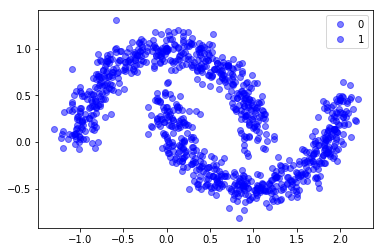

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5)
plt.legend(['0', '1'])

In [7]:
X.shape

(1000, 2)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


### Shallow model

In [10]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=0)

In [12]:
results = model.predict(X_test)

In [14]:
print("The Accuracy score on the Train set is:\t{}".format(results[1]))

The Accuracy score on the Train set is:	[ 0.00318487]


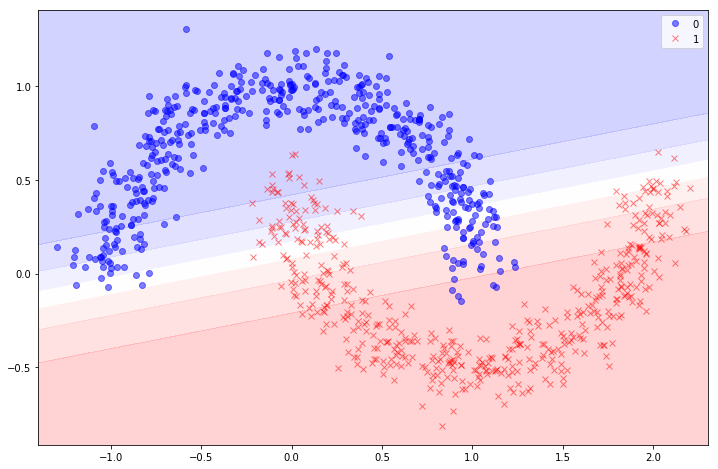

In [15]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [16]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [18]:
model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s300/300 [==============================] - 0s 129us/step


[0.00033448531680429973, 1.0]

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	1.000
The Accuracy score on the Test set is:	1.000


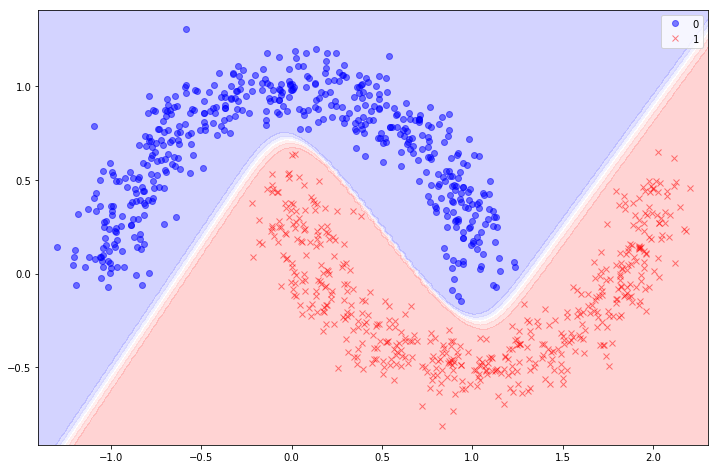

In [21]:
plot_decision_boundary(model, X, y)

### Multiclass classification

In [22]:
df = pd.read_csv("./data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


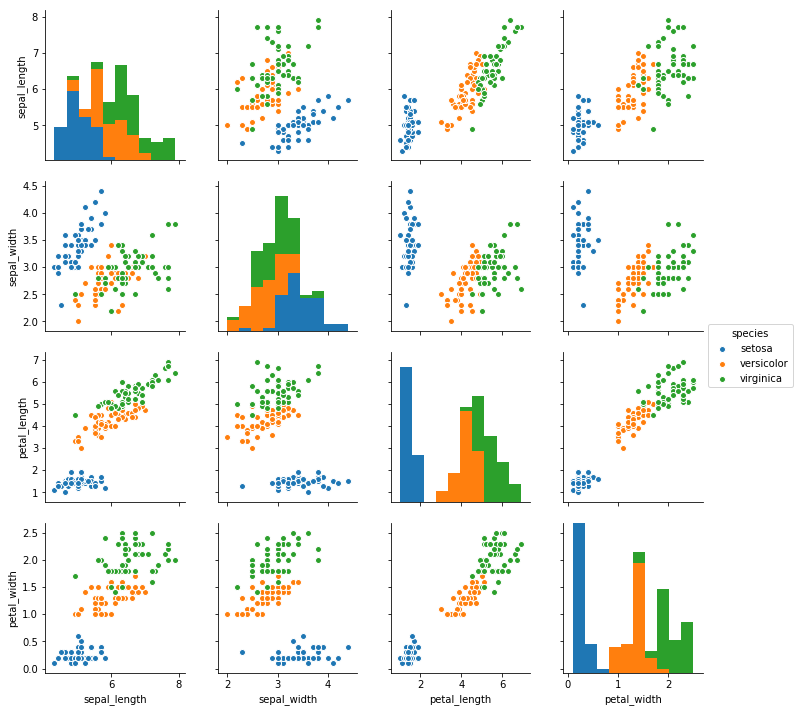

In [23]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [26]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [31]:
target_dict = {n:i for i,n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [32]:
y = df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [34]:
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(y)

In [35]:
y_cat[:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [37]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s 3ms/step - loss: 4.4606 - acc: 0.3241 - val_loss: 1.5452 - val_acc: 0.3333
Epoch 2/20
108/108 [==============================] - 0s 116us/step - loss: 1.3571 - acc: 0.4444 - val_loss: 2.6514 - val_acc: 0.1667
Epoch 3/20
108/108 [==============================] - 0s 80us/step - loss: 1.8572 - acc: 0.3796 - val_loss: 1.9914 - val_acc: 0.5000
Epoch 4/20
108/108 [==============================] - 0s 106us/step - loss: 1.2430 - acc: 0.4444 - val_loss: 0.7459 - val_acc: 0.4167
Epoch 5/20
108/108 [==============================] - 0s 90us/step - loss: 0.5569 - acc: 0.7778 - val_loss: 0.5482 - val_acc: 0.7500
Epoch 6/20
108/108 [==============================] - 0s 78us/step - loss: 0.6843 - acc: 0.6852 - val_los

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred[:5]

array([[  4.02686093e-03,   2.13464469e-01,   7.82508671e-01],
       [  6.09707728e-04,   7.49799237e-02,   9.24410343e-01],
       [  7.66161680e-01,   2.29376823e-01,   4.46141837e-03],
       [  2.67294664e-02,   6.94051385e-01,   2.79219121e-01],
       [  3.69585156e-02,   5.28218508e-01,   4.34822977e-01]], dtype=float32)

In [42]:
from sklearn.metrics import classification_report

In [43]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test_class, y_pred_class))
confusion_matrix(y_test_class, y_pred_class)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.70      0.82        10
          2       0.77      1.00      0.87        10

avg / total       0.92      0.90      0.90        30



array([[10,  0,  0],
       [ 0,  7,  3],
       [ 0,  0, 10]])

## Convolutional Neural Network

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [7]:
(X_train, y_train), ( X_test, y_test) = mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

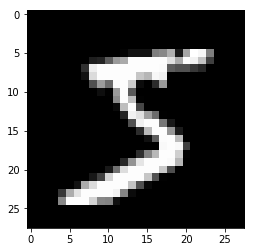

In [11]:
plt.imshow(X_train[0], cmap='gray')

In [13]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [14]:
X_train.shape

(60000, 784)

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [16]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [17]:
from keras.utils.np_utils import to_categorical

In [18]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [19]:
y_train[0]

5

In [20]:
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [21]:
y_train_cat.shape

(60000, 10)

In [22]:
y_test_cat.shape

(10000, 10)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_data = (X_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.2629 - acc: 0.9192 - val_loss: 0.1034 - val_acc: 0.9687
Epoch 2/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.0949 - acc: 0.9707 - val_loss: 0.0717 - val_acc: 0.9765
Epoch 3/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.0630 - acc: 0.9808 - val_loss: 0.0723 - val_acc: 0.9791
Epoch 4/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.0471 - acc: 0.9855 - val_loss: 0.0898 - val_acc: 0.9767
Epoch 5/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0377 - acc: 0.9889 - val_loss: 0.0826 - val_acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0297 - acc: 0.9910 - val_loss: 0.0933 - val_acc: 0.9777
Epoch 7/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0251 - acc: 0.9924 - val_loss: 0.

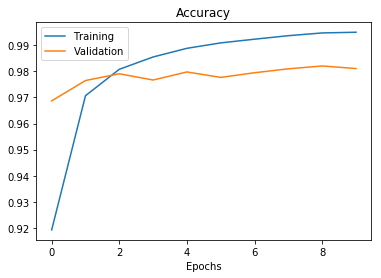

In [30]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [31]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]

10000/10000 [==============================] - 2s 171us/step


In [32]:
test_accuracy

0.98109999999999997

#### Tensor Math

In [33]:
A = np.random.randint(10, size=(2,3,4,5))
B = np.random.randint(10, size=(2,3))

In [34]:
A

array([[[[3, 8, 9, 8, 6],
         [1, 0, 3, 3, 6],
         [7, 5, 4, 2, 6],
         [9, 6, 9, 2, 7]],

        [[6, 2, 5, 0, 9],
         [5, 2, 0, 3, 0],
         [9, 5, 4, 0, 9],
         [2, 4, 2, 5, 6]],

        [[8, 7, 5, 0, 5],
         [1, 2, 9, 7, 1],
         [2, 2, 3, 9, 6],
         [5, 8, 7, 3, 8]]],


       [[[5, 0, 3, 8, 7],
         [1, 0, 3, 4, 2],
         [6, 3, 2, 8, 5],
         [1, 5, 9, 7, 8]],

        [[2, 3, 9, 7, 1],
         [5, 8, 9, 6, 8],
         [4, 7, 6, 4, 4],
         [2, 9, 2, 4, 3]],

        [[5, 0, 3, 2, 8],
         [7, 2, 9, 6, 3],
         [2, 0, 5, 6, 7],
         [6, 4, 0, 0, 3]]]])

In [35]:
A[0, 1, 0, 3]

0

In [36]:
B

array([[9, 7, 4],
       [7, 6, 5]])

#### A random colored image

In [37]:
img = np.random.randint(255, size=(4,4,3), dtype='uint8')
img

array([[[ 38, 186, 202],
        [194, 172, 215],
        [ 31,  57,   8],
        [205, 125,  82]],

       [[156, 183, 135],
        [ 76, 206, 156],
        [ 37, 199, 183],
        [ 67,  48, 151]],

       [[165, 247,  75],
        [145, 250, 150],
        [197, 204, 167],
        [175, 101,  67]],

       [[194,  97,  95],
        [141, 236, 237],
        [131, 102,   8],
        [ 91, 106, 116]]], dtype=uint8)

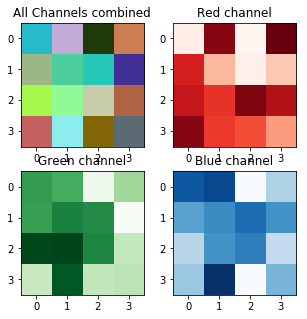

In [38]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

In [39]:
#### tensor operation
2*A

array([[[[ 6, 16, 18, 16, 12],
         [ 2,  0,  6,  6, 12],
         [14, 10,  8,  4, 12],
         [18, 12, 18,  4, 14]],

        [[12,  4, 10,  0, 18],
         [10,  4,  0,  6,  0],
         [18, 10,  8,  0, 18],
         [ 4,  8,  4, 10, 12]],

        [[16, 14, 10,  0, 10],
         [ 2,  4, 18, 14,  2],
         [ 4,  4,  6, 18, 12],
         [10, 16, 14,  6, 16]]],


       [[[10,  0,  6, 16, 14],
         [ 2,  0,  6,  8,  4],
         [12,  6,  4, 16, 10],
         [ 2, 10, 18, 14, 16]],

        [[ 4,  6, 18, 14,  2],
         [10, 16, 18, 12, 16],
         [ 8, 14, 12,  8,  8],
         [ 4, 18,  4,  8,  6]],

        [[10,  0,  6,  4, 16],
         [14,  4, 18, 12,  6],
         [ 4,  0, 10, 12, 14],
         [12,  8,  0,  0,  6]]]])

In [40]:
A + A

array([[[[ 6, 16, 18, 16, 12],
         [ 2,  0,  6,  6, 12],
         [14, 10,  8,  4, 12],
         [18, 12, 18,  4, 14]],

        [[12,  4, 10,  0, 18],
         [10,  4,  0,  6,  0],
         [18, 10,  8,  0, 18],
         [ 4,  8,  4, 10, 12]],

        [[16, 14, 10,  0, 10],
         [ 2,  4, 18, 14,  2],
         [ 4,  4,  6, 18, 12],
         [10, 16, 14,  6, 16]]],


       [[[10,  0,  6, 16, 14],
         [ 2,  0,  6,  8,  4],
         [12,  6,  4, 16, 10],
         [ 2, 10, 18, 14, 16]],

        [[ 4,  6, 18, 14,  2],
         [10, 16, 18, 12, 16],
         [ 8, 14, 12,  8,  8],
         [ 4, 18,  4,  8,  6]],

        [[10,  0,  6,  4, 16],
         [14,  4, 18, 12,  6],
         [ 4,  0, 10, 12, 14],
         [12,  8,  0,  0,  6]]]])

In [41]:
A.shape

(2, 3, 4, 5)

In [42]:
B.shape

(2, 3)

In [43]:
np.tensordot(A, B, axes=([0,1], [0,1]))

array([[173, 132, 226, 180, 232],
       [120,  80, 183, 170, 135],
       [210, 151, 151, 164, 235],
       [164, 223, 198, 138, 226]])

In [44]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

### 1-D convolution

In [46]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [47]:
b = np.array([-1, 1], dtype='float32')

In [48]:
c = np.convolve(a,b)

In [49]:
a

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.], dtype=float32)

In [50]:
b

array([-1.,  1.], dtype=float32)

In [51]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

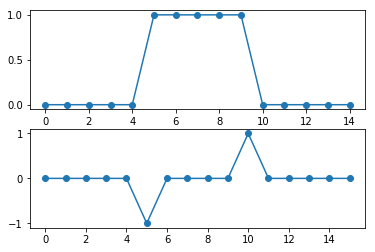

In [53]:
plt.subplot(211)
plt.plot(a, 'o-')
plt.subplot(212)
plt.plot(c, 'o-')

### Image filters with convolutions

In [55]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [56]:
img = misc.ascent()

In [57]:
img.shape

(512, 512)

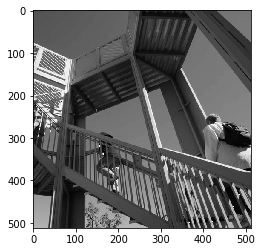

In [58]:
plt.imshow(img, cmap='gray')

In [59]:
h_kernel = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

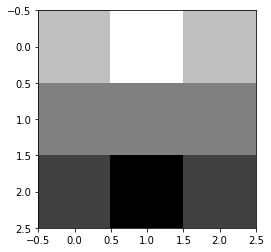

In [60]:
plt.imshow(h_kernel, cmap='gray')

In [61]:
res = convolve2d(img, h_kernel)

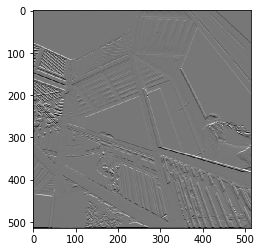

In [62]:
plt.imshow(res, cmap='gray')

In [63]:
from keras.layers import Conv2D

In [64]:
img.shape

(512, 512)

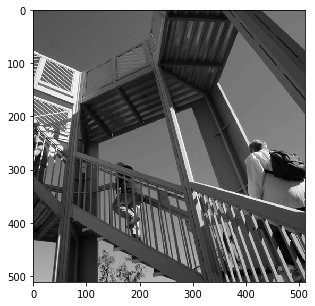

In [65]:
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')

In [66]:
img_tensor = img.reshape([1, 512, 512, 1])

In [67]:
model = Sequential()
model.add(Conv2D(1, (3,3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [69]:
img_pred_tensor = model.predict(img_tensor)

In [70]:
img_pred = img_pred_tensor[0, :, :, 0]

In [81]:
img_pred.shape

(255, 510)

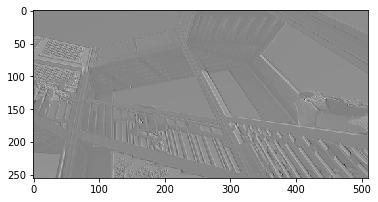

In [71]:
plt.imshow(img_pred, cmap='gray')

In [72]:
weights = model.get_weights()

In [73]:
weights[0].shape

(3, 3, 1, 1)

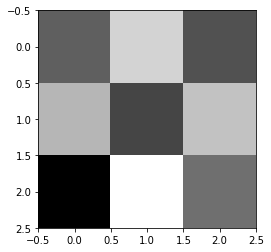

In [74]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [75]:
weights[0] = np.ones(weights[0].shape)

In [76]:
model.set_weights(weights)

In [77]:
img_pred_tensor = model.predict(img_tensor)

In [78]:
img_pred = img_pred_tensor[0, :, :, 0]

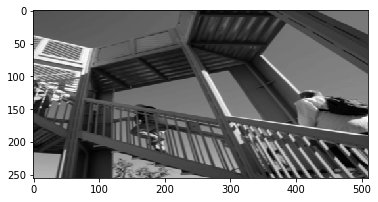

In [79]:
plt.imshow(img_pred, cmap='gray')

In [80]:
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 512, 512, 1)

#### Pooling layers

In [82]:
from keras.layers import MaxPool2D, AvgPool2D

In [85]:
model = Sequential()
model.add(MaxPool2D((5,5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [86]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

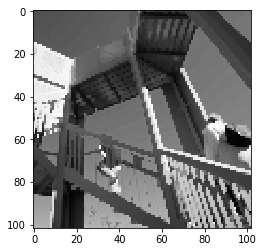

In [87]:
plt.imshow(img_pred, cmap='gray')

In [88]:
model = Sequential()
model.add(AvgPool2D((5,5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

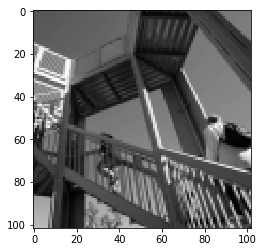

In [90]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

In [91]:
#### Final Architecture
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [92]:
X_train.shape

(60000, 28, 28, 1)

In [93]:
from keras.layers import Flatten, Activation

In [106]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', 
              optimizer='Adam', metrics=['accuracy'])

In [108]:
model.fit(X_train, y_train_cat, batch_size=128, epochs=2, 
          verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 47s 1ms/step - loss: 0.2923 - acc: 0.9158 - val_loss: 0.1394 - val_acc: 0.9607
Epoch 2/2
42000/42000 [==============================] - 42s 1ms/step - loss: 0.1085 - acc: 0.9687 - val_loss: 0.0972 - val_acc: 0.9722


In [109]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 4s 398us/step


[0.085503687008097767, 0.97470000000000001]